Kacper Staroń
298842

## PD6 Klasteryzacja

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

### Przygotowanie środowiska

In [174]:
#podstawowe narzędzia do obróbki i wizualizacji danych
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#algorytmy klasteryzujące
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#metryki
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

### Wstępne załadowanie danych

In [175]:
data = pd.read_csv('../../clustering_R3.csv')
data.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


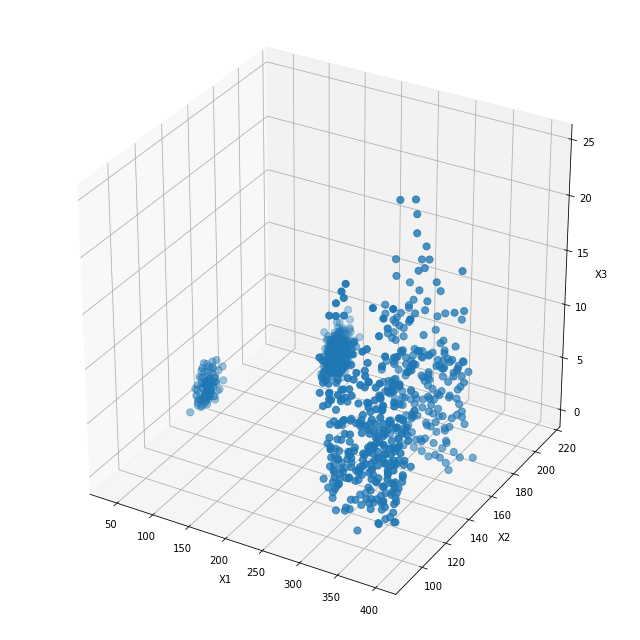

In [176]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

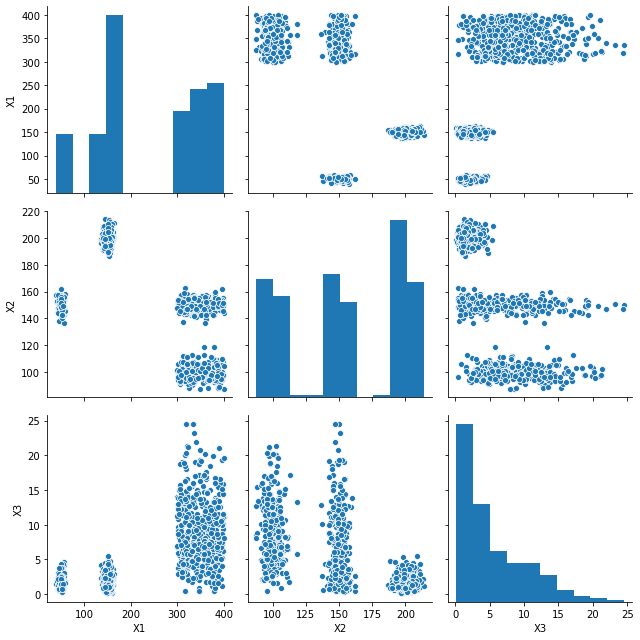

In [177]:
sns.pairplot(data, height=3)
plt.tight_layout()

### Standaryzacja

In [178]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns = ['X1', 'X2', 'X3'])
data.head()

,X1,X2,X3
0,-0.762807,1.024554,-0.909772
1,-0.819582,1.125110,-0.566853
2,-0.733687,1.029615,-1.004782
3,-0.777429,1.236698,-0.995176
4,-0.781982,1.203537,-0.396348


### Użyte metryki

Do oceny efektywności porównywanych algorytmów klasteryzujących zostaną wykorzystane 3 metryki:
* silhouette - współczynnik (Silhouette Coefficient) zależny od średnich odległości obserwacji od pozostałych punktów wewnątrz grupy i punktów wewnątrz najbliższej sąsiedniej grupy. Im wyższa wartość, tym lepszej jakości badany podział.
* indeks Daviesa-Bouldina - miara średniego stopnia podobieństwa klastra z najbardziej podobnym do niego klastrem, gdzie przez podobieństwo rozumiemy stosunek odległości wewnątrz klastra i między klastrami. Im wspołczynnik bliższy zeru, tym lepszej jakości badany podział.
* indeks Calińskiego-Harabasza - miara stosunku rozproszenia wewnątrz klastra i między klastrami. Im wartość współczynnika niższa, tym lepszej jakości badany podział.


### Algorytm K-Means

Pierwszym analizowanym algorytmem klasteryzującym będzie podstawowy algorytm K-średnich.

In [179]:
def count_scores_kmeans(X, k_min, k_max):
    silh_scores = []
    db_scores = []
    ch_scores = []
    
    for k in range(k_min, k_max+1):
        model = KMeans(n_clusters=k, random_state=0, n_init=100)
        y = model.fit_predict(X)
        silh_scores.append(silhouette_score(X, y))
        db_scores.append(davies_bouldin_score(X, y))
        ch_scores.append(calinski_harabasz_score(X, y))
        
        
    return silh_scores, db_scores, ch_scores

In [180]:
def plot_scores(score, title):
    x_ticks = list(range(1, len(score) + 1))
    plt.plot(x_ticks, score, 'bx-')
    plt.xlabel('k')
    plt.ylabel('score')
    plt.title(title)
    plt.show()

In [181]:
silh_kmeans, db_kmeans, ch_kmeans = count_scores_kmeans(data, 2, 15)

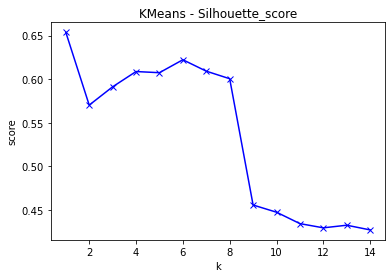

In [182]:
plot_scores(silh_kmeans, "KMeans - Silhouette_score")

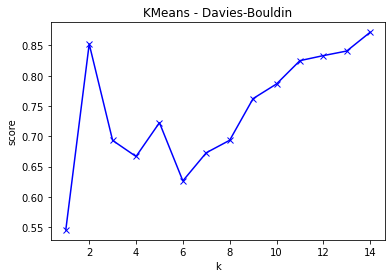

In [183]:
plot_scores(db_kmeans, "KMeans - Davies-Bouldin")

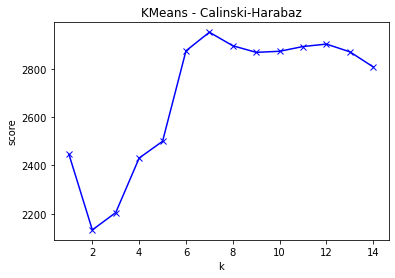

In [184]:
plot_scores(ch_kmeans, "KMeans - Calinski-Harabaz")

Miary silhouette i Daviesa-Bouldina wskazują na 6 klastrów, tymczasem miara Calińskiego-Harabasza zdecydowanie na 2.\
Zwizualizujmy takie podziały.

#### K = 2

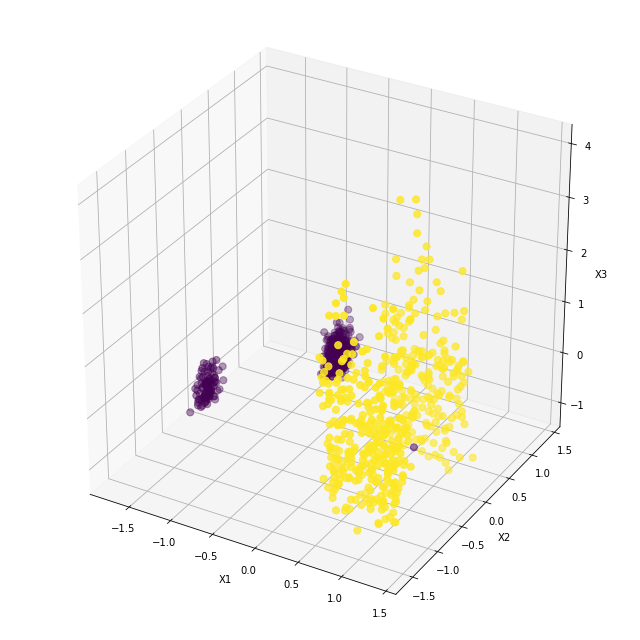

In [223]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=0)
y = kmeans.fit_predict(data)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

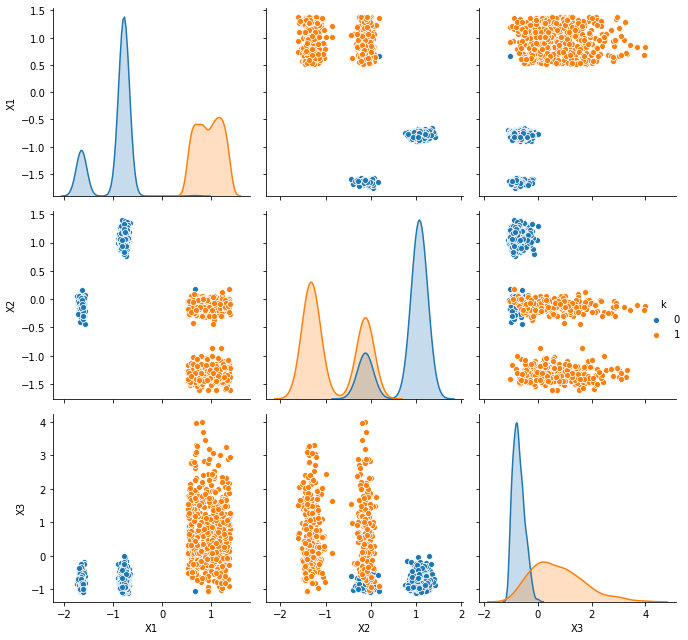

In [224]:
y = kmeans.fit(data)
data['k']= hue=y.predict(data)

sns.pairplot(data, height=3, hue='k')
plt.tight_layout()



#### K = 6

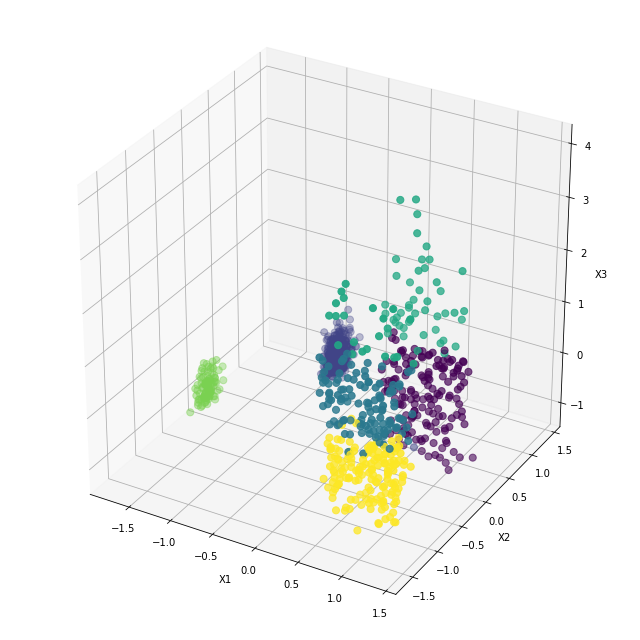

In [187]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=0)
y = kmeans.fit_predict(data)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

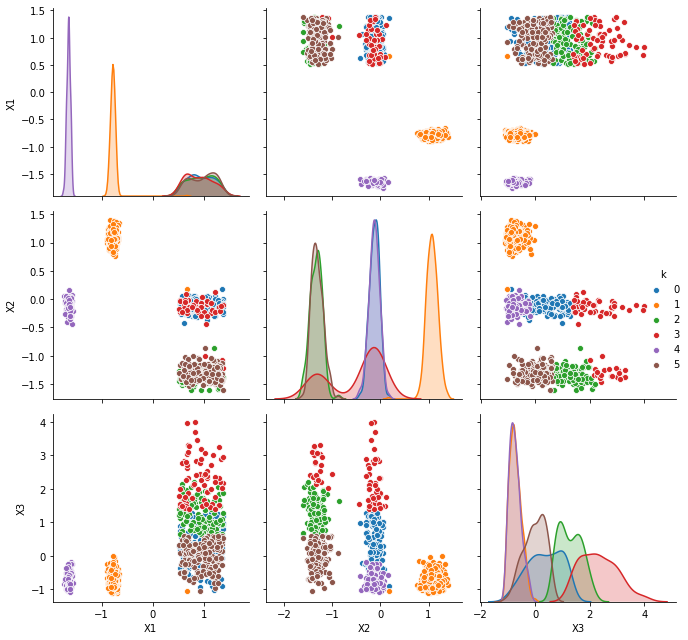

In [188]:
y = kmeans.fit(data)
data['k']= hue=y.predict(data)

sns.pairplot(data, height=3, hue='k')
plt.tight_layout()



### Algorytm Gaussian Mixture Models

In [189]:
def count_scores_gmm(X, k_min, k_max):
    silh_scores = []
    db_scores = []
    ch_scores = []
    
    for k in range(k_min, k_max+1):
        model = GaussianMixture(n_components=k, n_init=100)
        y = model.fit_predict(X)
        silh_scores.append(silhouette_score(X, y))
        db_scores.append(davies_bouldin_score(X, y))
        ch_scores.append(calinski_harabasz_score(X, y))
        
        
    return silh_scores, db_scores, ch_scores


In [200]:
silh_gmm, db_gmm, ch_gmm = count_scores_gmm(data, 2, 15)

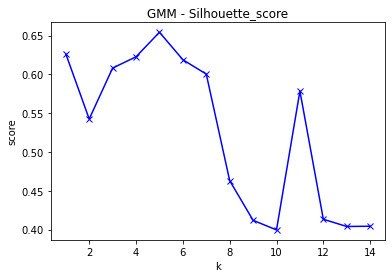

In [201]:
plot_scores(silh_gmm, "GMM - Silhouette_score")

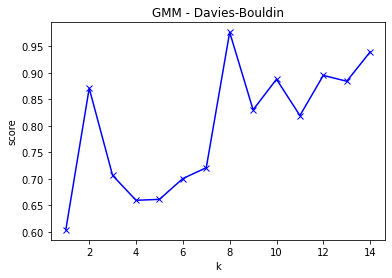

In [202]:
plot_scores(db_gmm, "GMM - Davies-Bouldin")

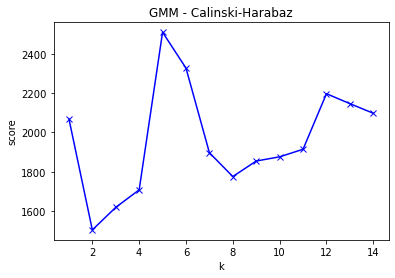

In [203]:
plot_scores(ch_gmm, "GMM - Calinski-Harabaz")

Silhouette wskazuje tym razem na 5, co wydaje się pokrywać ze wskazaniami indeksu Daviesa-Bouldina.\
Tymczasem miara Calińskiego-Harabasza ponownie jednoznacznie wskazuje na 2 klastry. Sprawdżmy zatem, jak z takim podziałem poradził sobie algorytm GMM.

#### K = 2

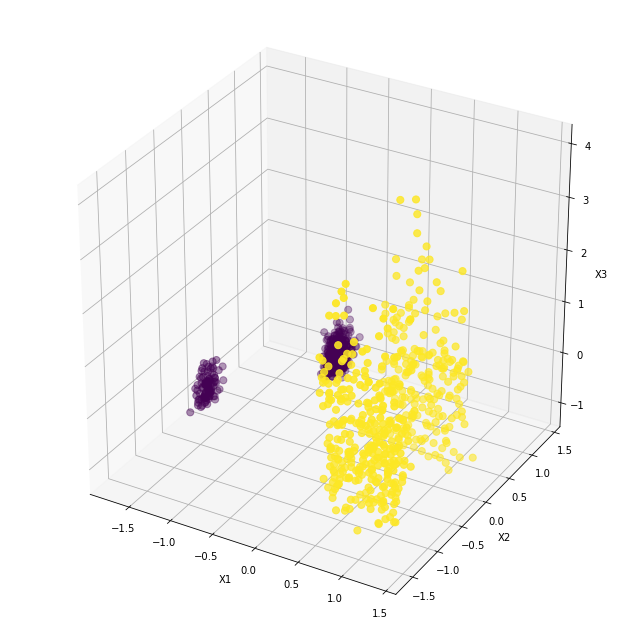

In [204]:
gmm = GaussianMixture(n_components=2, n_init=100)
y = gmm.fit_predict(data)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

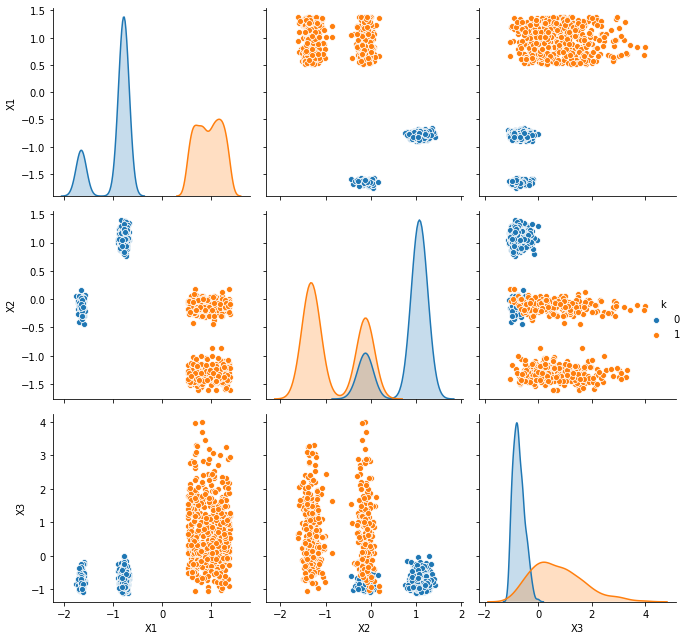

In [205]:
y = gmm.fit(data)
data['k']= hue=y.predict(data)

sns.pairplot(data, height=3, hue='k')
plt.tight_layout()



#### K=5

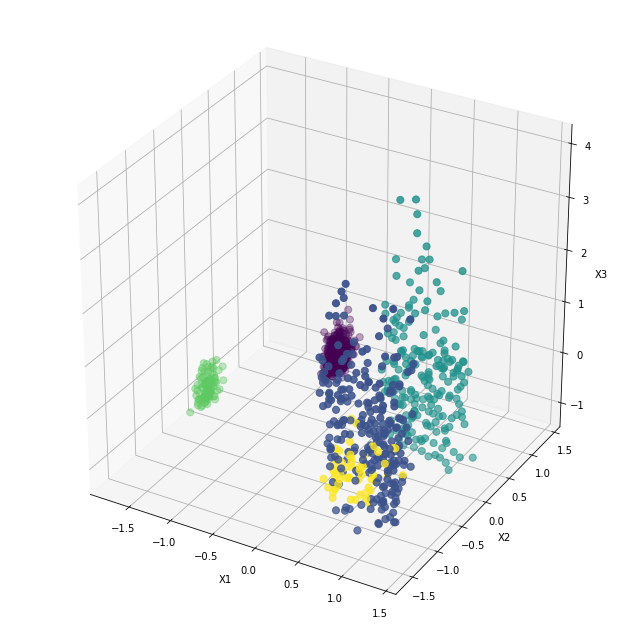

In [206]:
gmm = GaussianMixture(n_components=5, n_init=100)
y = gmm.fit_predict(data)


fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, c = y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.tight_layout()
plt.show()

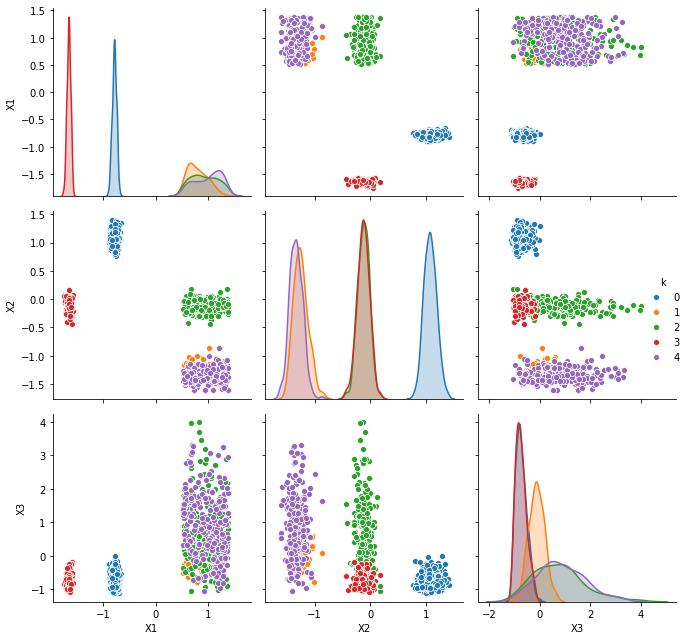

In [207]:
y = gmm.fit(data)
data['k']= hue=y.predict(data)

sns.pairplot(data, height=3, hue='k')
plt.tight_layout()



### Podsumowanie

In [214]:
results = pd.DataFrame({'Silhouette':[max(silh_kmeans), max(silh_gmm)],
                      'Davies-Bouldin': [min(db_kmeans), min(db_gmm)],
                      'Calinski-Harabasz':[min(ch_kmeans), min(ch_gmm)]}, index = ['KMeans', 'GMM'])

In [215]:
results

,Silhouette,Davies-Bouldin,Calinski-Harabasz
KMeans,0.653826,0.545201,2133.267511
GMM,0.654317,0.603857,1504.329577


Według miary silhouette oba algorytmy radzą sobie bardzo podobnie, wskazując podobne liczby klastrów (odpowiednio 6 i 5) otrzymują zbliżoną wartość współczynnika.\
Podobnie zbliżone wyniki pozwoli uzyskać index Daviesa-Bouldina. \
Znaczną różnicę wyników działania algorytmów obserwujemy dla trzeciej z miar, gdzie ze zdecydowaną pewnością oba algorytmy wskazują na dwa klastry. Co ciekawe, po pobieżnych oględzinach podział na dwa klastry przy użyciu algorytmu KMeans jest bardzo podobny do podziału GMM, mimo że podczas analizy z użyciem metryk indeks Calinskiego-Harabasza uzyskane wartości znaczeni się różnią.\
\
Ostatecznie po uwzględnieniu wszystkich metryk jednak skłaniałbym się do zastosowania 5 lub 6 klastrów do podziału zadanego zbioru raczej niż 2.